In [5]:
# set working directory
import os
os.getcwd()
cdir = 'C:\\Users\\AM254492\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections'
os.chdir(cdir)
os.getcwd()

'C:\\Users\\AM254492\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections'

In [6]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#import Data Set
stat = pd.read_excel('Worksheet in ai_ml_0.xlsx')

In [8]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
Emp#             25 non-null int64
YearsOfExp       25 non-null int64
Salary in Rs.    25 non-null int64
dtypes: int64(3)
memory usage: 680.0 bytes


In [11]:
stat.describe()

,Emp#,YearsOfExp,Salary in Rs.
count,25.000000,25.000000,25.000000
mean,13.000000,6.200000,77821.200000
std,7.359801,3.175426,39847.615281
min,1.000000,1.000000,12598.000000
25%,7.000000,3.000000,37592.000000
50%,13.000000,7.000000,87654.000000
75%,19.000000,9.000000,113112.000000
max,25.000000,10.000000,126015.000000


In [12]:
stat.head()

,Emp#,YearsOfExp,Salary in Rs.
0,1,10,126015
1,2,1,12598
2,3,8,100639
3,4,10,125351
4,5,2,25031


In [26]:
stat.drop('Emp#',axis=1,inplace = True)

In [28]:
stat.mean()

YearsOfExp           6.2
Salary in Rs.    77821.2
dtype: float64

In [29]:
stat.median()

YearsOfExp           7.0
Salary in Rs.    87654.0
dtype: float64

In [30]:
stat.std()

YearsOfExp           3.175426
Salary in Rs.    39847.615281
dtype: float64

In [35]:
stat['YearsOfExp'].mode()

0    10
dtype: int64

In [36]:
stat['Salary in Rs.'].mode()

0    100639
dtype: int64

In [43]:
stat.var()

YearsOfExp       1.008333e+01
Salary in Rs.    1.587832e+09
dtype: float64

In [13]:
#import Mpg
mpg = pd.read_csv('auto-mpg.txt',header=None,delim_whitespace=True,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

In [14]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [15]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
mpg[mpg['horsepower']!= '?']['horsepower'].astype(float).mean()

104.46938775510205

In [17]:
#imputed with mean value
mpg[mpg['horsepower'] =='?']= 104.45

In [18]:
mpg['horsepower']=mpg['horsepower'].astype(float)

In [19]:
#drop carname permanently
mpg.drop(['car name'],axis=1,inplace=True)

In [20]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null float64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null float64
origin          398 non-null float64
dtypes: float64(8)
memory usage: 25.0 KB


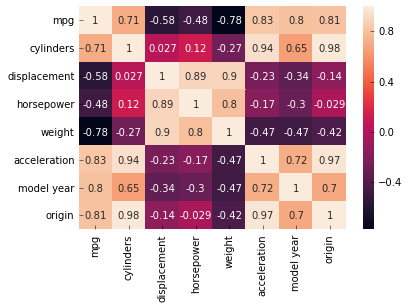

In [21]:
sns.heatmap(mpg.corr(),annot=True)

Train Test Split

In [22]:
from sklearn.cross_validation import train_test_split

In [23]:
# in X we droped the target mpg
X_train, X_test, y_train, y_test = train_test_split(mpg.drop(['mpg'],axis=1), mpg['mpg'], test_size=0.2, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Inititatlize linear regression
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('Coefficient:', lm.coef_)
print('Intercept', lm.intercept_)
print('Residues',lm.residues_)

Coefficient: [-0.82687347  0.02730592 -0.02534905 -0.00644767  0.03718859  0.777108
  1.17855484]
Intercept -16.8586052006
Residues 3353.55917593


C:\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


PREDICTION FROM OUR MODEL

In [28]:
y_pred = lm.predict(X_test)

In [29]:
y_test.shape

(80,)

In [30]:
y_pred.shape

(80,)

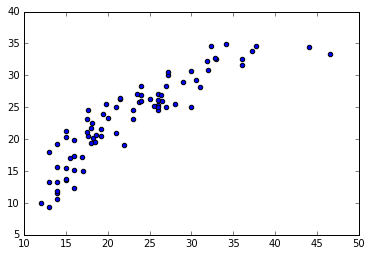

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.826873
displacement,0.027306
horsepower,-0.025349
weight,-0.006448
acceleration,0.037189
model year,0.777108
origin,1.178555


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


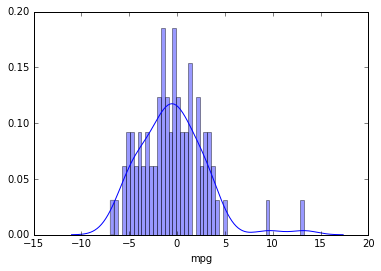

In [33]:
#Residuals distribution
sns.distplot((y_test-y_pred),bins=50)

In [34]:
from sklearn import metrics

In [35]:
#calculating R2
metrics.r2_score(y_test,y_pred)

0.79602709020096196

In [113]:
#
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2:8]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [102]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2:8]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [103]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]


In [88]:
point = mpg
point[:30]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0


In [59]:
#Convert Dataframe into array
points = point.reset_index().values
points

array([[   0. ,   18. ,    8. , ...,   12. ,   70. ,    1. ],
       [   1. ,   15. ,    8. , ...,   11.5,   70. ,    1. ],
       [   2. ,   18. ,    8. , ...,   11. ,   70. ,    1. ],
       ..., 
       [ 395. ,   32. ,    4. , ...,   11.6,   82. ,    1. ],
       [ 396. ,   28. ,    4. , ...,   18.6,   82. ,    1. ],
       [ 397. ,   31. ,    4. , ...,   19.4,   82. ,    1. ]])

In [60]:
len(points)

398

In [52]:
type(point)

pandas.core.frame.DataFrame

In [51]:
type(points)

numpy.ndarray

In [104]:
# Initialize the hyper parameters
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

In [114]:
# To get respective Value in array like Matrix 1 Row and 4 th Coloumn
points[1,6]

11.5

In [105]:
#Call function
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))


Starting gradient descent at b = 0, m = 0, error = [ 765.74008794  765.74008794  765.74008794  765.74008794  765.74008794
  765.74008794]


In [106]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
   

In [118]:
[b,m]

[array([  2.77654534e+000,               nan,  -5.16727974e+165,
                      nan,   5.81207179e-001,  -1.06273653e-001]),
 array([  1.33001417e+000,               nan,  -6.11808146e+167,
                      nan,   1.27515071e+000,   3.31453862e-001])]

In [108]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = [  2.77654534e+000               nan  -5.16727974e+165               nan
   5.81207179e-001  -1.06273653e-001], m = [  1.33001417e+000               nan  -6.11808146e+167               nan
   1.27515071e+000   3.31453862e-001], error = [ 289.50396957           nan           inf           nan   71.27237056
  126.79695429]


In [109]:
points[1]

array([  1.00000000e+00,   1.50000000e+01,   8.00000000e+00,
         3.50000000e+02,   1.65000000e+02,   3.69300000e+03,
         1.15000000e+01,   7.00000000e+01,   1.00000000e+00])

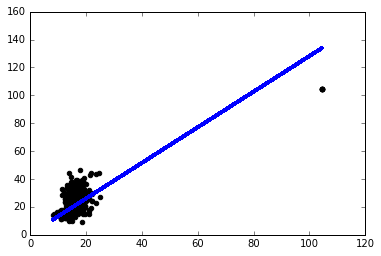

In [121]:
# Plot outputs
for i in range(0, len(points)):
        x = points[i, 6]
        y = points[i, 1]
        plt.scatter(x,y,color='black')

        plt.plot(mpg.acceleration, (1.27515071e+000 * mpg.acceleration + 5.81207179e-001), color='blue',linewidth=3)

In [139]:
#univariate model linear regression
unimodel = pd.DataFrame(mpg,columns=['mpg','acceleration'])

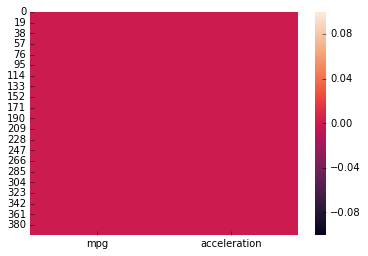

In [141]:
sns.heatmap(unimodel.isnull())

In [142]:
unimodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 2 columns):
mpg             398 non-null float64
acceleration    398 non-null float64
dtypes: float64(2)
memory usage: 6.3 KB


In [126]:
x = unimodel.acceleration
y = unimodel.mpg

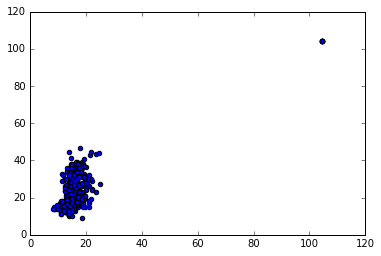

In [127]:
plt.scatter(x,y)

In [128]:
unimodel.corr()

,mpg,acceleration
mpg,1.000000,0.827043
acceleration,0.827043,1.000000


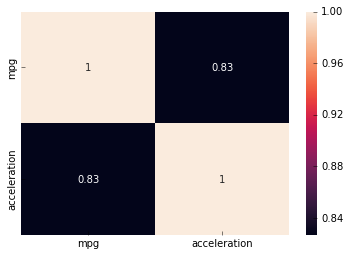

In [131]:
sns.heatmap(unimodel.corr(),annot= True)

In [135]:

#Train Text Model
from sklearn.cross_validation import train_test_split

In [161]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [166]:
yn_train

57      24.00
389     22.00
320     37.00
357     32.90
160     17.00
385     38.00
356     32.40
334     23.70
287     16.50
69      12.00
397     31.00
170     23.00
165     20.00
325     44.30
361     25.40
64      15.00
39      14.00
95      12.00
364     26.60
9       15.00
378     38.00
12      15.00
302     34.50
377     31.00
211     16.50
117     29.00
16      18.00
375     36.00
36      19.00
156     16.00
        ...  
76      18.00
126    104.45
275     17.00
249     19.90
328     30.00
44      13.00
59      23.00
376     37.00
371     29.00
136     16.00
111     18.00
339     26.60
49      23.00
390     32.00
5       15.00
110     22.00
192     22.00
220     33.50
316     19.10
245     36.10
393     27.00
132     25.00
40      14.00
75      14.00
87      13.00
63      14.00
326     43.40
337     32.40
11      14.00
351     34.40
Name: mpg, dtype: float64

In [167]:
#linear regression same as multivariate model
